# The pendulum environment

This environment simulates a torque-controlled pendulum. It is particularly interesting when it is under-actuated, i.e. when the torque limit does not allow to swap the pendulum from the stable equilibrium point (lower position) to its unstable equilibrium point (upper position) by applying the maximum torque.

First, we create the environment as usual (see [this tutorial](http://nbviewer.ipython.org/github/flowersteam/explauto/blob/master/notebook/setting_environments.ipynb)):

In [1]:
from explauto.environment import environments

import matplotlib.pyplot as plt
import numpy as np

env_cls, env_configs, _ = environments['pendulum']
env = env_cls(**env_configs['default'])

The initial state of the pendulum is the lower position with a null velocity, i.e. the stable equilibrium point. The current state can be get or set using:

In [14]:
env.x

[-3.141592653589793, 0.0]

The first scalar is the current angle position (here: $\pi$) and the second one is the current angular velocity (here: $0$). To plot the current pendulum position, use:

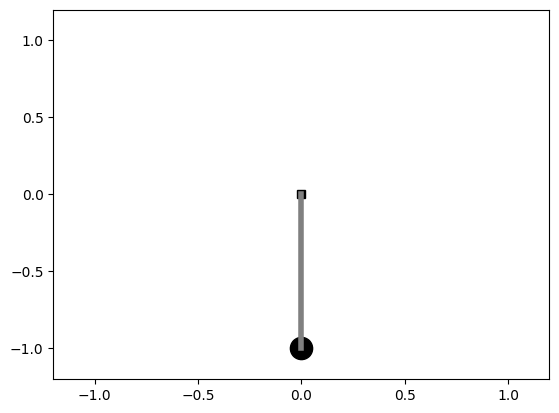

In [2]:
ax = plt.axes()
env.plot_current_state(ax)

The time step of the simulation can be get or set using:

In [3]:
env.dt

0.25

To apply a torque $u$ on the pendulum during a duration of env.dt, we can use:

In [4]:
u = [0.1]
env.apply_torque(u)

We observe that the current state of the pendulum has changed accordingly:

In [5]:
env.x

[array([-3.13846765]), array([0.025])]

Now let's apply a torque trajectory, for example a torque of 0.25 during 100 time steps, and plot the pendulum position at each time step:

In [7]:
U = [0.25] * 100
env.reset() # reset to lower position
for u in U:
    ax.cla()
    env.apply_torque(u)
    env.plot_current_state(ax)
    plt.draw()

<Figure size 640x480 with 0 Axes>

Due to the under-actuated nature of the pendulum (with torque max at 0.25), we observe that the above torque trajectory does not allow to swap the pendulum to the upper position. To achieve this, one should use a bang-bang policy instead:

In [11]:
U = [0.25] * 15 + [-0.25] * 15 + [0.25] * 19
env.reset() # reset to lower position
for u in U:
    ax.cla()
    env.apply_torque(u)
    env.plot_current_state(ax)
    plt.draw()

<Figure size 640x480 with 0 Axes>